In [ ]:
!pip install gensim

In [ ]:
import gensim
from gensim.models import Word2Vec,KeyedVectors

In [ ]:
# import gensim.downloader as api
# wv = api.load('word2vec-google-news-300')

In [ ]:
import pandas as pd

message = pd.read_csv('/content/SMSSpamCollection.txt',names=['label','message'],sep='\t')

In [ ]:
message

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


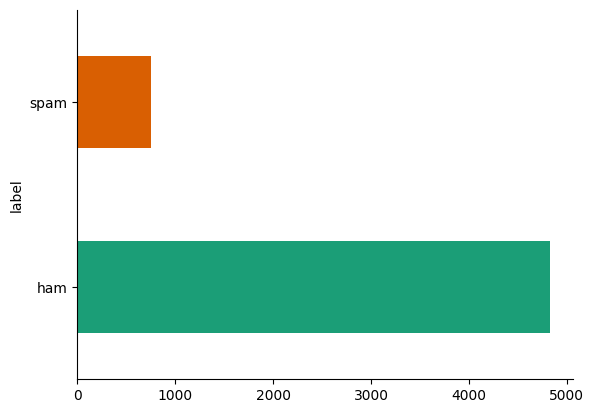

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
message.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
message['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
import re
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
corpus = []
for i in range(len(message)):
  review = re.sub('[^A-Za-z]',' ',message['message'][i])
  review = review.lower()
  review = review.split()
  words = [lemmatizer.lemmatize(word) for word in review]
  words = ' '.join(words)
  corpus.append(words)

In [ ]:
corpus

In [ ]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
words = []
for sent in corpus:
  sent_token = sent_tokenize(sent)
  for sent in sent_token:
    words.append(simple_preprocess(sent))

In [ ]:
words

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'in',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'to',
  'to',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'so', 'early', 'hor', 'already', 'then', 'say'],
 ['nah',
  'don',
  'think',
  'he',
  'go',
  'to',
  'usf',
  'he',
  'life',
  'around',
  'here',
  'though'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  'it',
  'been',
  'week',
  'now',
  'and',
  'no',
  'word',
  'back',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'to',
  'send',
  'to',
  'rcv'],
 ['even',
  'my',
  'brother',
  'is',
  'not',
  'like',
  'to',
  'spea

In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm

In [ ]:
model = Word2Vec(words)

In [ ]:
model.wv.index_to_key

['to',
 'you',
 'the',
 'it',
 'and',
 'in',
 'is',
 'me',
 'my',
 'for',
 'your',
 'call',
 'of',
 'that',
 'have',
 'on',
 'now',
 'are',
 'can',
 'so',
 'but',
 'not',
 'or',
 'we',
 'do',
 'get',
 'at',
 'ur',
 'will',
 'if',
 'be',
 'with',
 'no',
 'just',
 'this',
 'gt',
 'lt',
 'go',
 'how',
 'up',
 'when',
 'ok',
 'day',
 'what',
 'free',
 'from',
 'all',
 'out',
 'know',
 'll',
 'come',
 'like',
 'good',
 'time',
 'am',
 'then',
 'got',
 'wa',
 'there',
 'he',
 'love',
 'text',
 'only',
 'want',
 'send',
 'one',
 'need',
 'txt',
 'today',
 'by',
 'going',
 'don',
 'stop',
 'home',
 'she',
 'about',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'dont',
 'our',
 'think',
 'tell',
 'week',
 'hi',
 'phone',
 'they',
 'new',
 'please',
 'later',
 'pls',
 'any',
 'her',
 'ha',
 'co',
 'did',
 'been',
 'msg',
 'min',
 'some',
 'an',
 'night',
 'make',
 'dear',
 'who',
 'here',
 'message',
 'say',
 'well',
 'where',
 're',
 'thing',
 'much',
 'oh',

In [ ]:
model.corpus_count

5569

In [ ]:
model.epochs

5

In [ ]:
model.wv.similar_by_word('happy')

[('day', 0.9991648197174072),
 ('my', 0.9990472793579102),
 ('dear', 0.9989744424819946),
 ('nice', 0.998877763748169),
 ('great', 0.9988419413566589),
 ('wish', 0.9988292455673218),
 ('hey', 0.9988220930099487),
 ('thing', 0.9987698197364807),
 ('sleep', 0.9987659454345703),
 ('really', 0.9987409114837646)]

In [ ]:
# def avg_word2vec(doc):
#   return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key])

# X = []
# for i in tqdm(range(len(words))):
#   X.append(avg_word2vec(words[i]))


In [ ]:
import numpy as np

In [ ]:
def avg_word2vec(doc):
    vectors = [model.wv[word] for word in doc if word in model.wv.index_to_key]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Generate the list of average word2vec vectors for each document
X = [avg_word2vec(doc) for doc in tqdm(words)]

100%|██████████| 5569/5569 [00:01<00:00, 5291.25it/s]


Independant features

In [ ]:
X

[array([-0.09941364,  0.1830273 ,  0.09329917,  0.03317241,  0.09073354,
        -0.49018103,  0.20025834,  0.4981055 , -0.27530652, -0.1508489 ,
        -0.15028544, -0.3653413 , -0.07631909,  0.06006842,  0.21265092,
        -0.16054656,  0.10616476, -0.31080252,  0.01917272, -0.54537207,
         0.18601613,  0.08030611,  0.13163778, -0.2179912 ,  0.00274911,
         0.0308864 , -0.23353408, -0.2535027 , -0.257219  ,  0.04402436,
         0.28364047, -0.04899342,  0.14609337, -0.16118126, -0.15843768,
         0.3766155 ,  0.01952292, -0.1759011 , -0.17947774, -0.4507418 ,
         0.03765486, -0.20871595, -0.16775055,  0.04027206,  0.1930316 ,
         0.02590239, -0.17989424, -0.09223589,  0.23073855,  0.09481581,
         0.19217815, -0.19248316,  0.00128631, -0.02110493, -0.15634854,
         0.10845264,  0.16778818,  0.06060151, -0.41323626,  0.08171563,
         0.04220311,  0.06779607, -0.0927889 , -0.1211256 , -0.28001234,
         0.29822913,  0.05385296,  0.27552706, -0.3

In [ ]:
len(X)

5569

In [ ]:
X_new = np.array(X)

In [ ]:
X_new.shape

(5569, 100)

In [ ]:
X_new[1]

array([-0.0979837 ,  0.15970422,  0.07986289,  0.02919688,  0.08586596,
       -0.43060118,  0.16200584,  0.44101825, -0.24300092, -0.12716463,
       -0.13883512, -0.31930447, -0.06021662,  0.05692522,  0.19139373,
       -0.14810981,  0.09363247, -0.27896231,  0.00730196, -0.48163402,
        0.16858873,  0.06722909,  0.10786778, -0.18630612,  0.00260758,
        0.02907153, -0.20441163, -0.23795062, -0.22429429,  0.03591458,
        0.25000304, -0.04034606,  0.11972223, -0.14047112, -0.13934855,
        0.32882655,  0.00861044, -0.1548107 , -0.151568  , -0.39942178,
        0.03321031, -0.17689119, -0.13836403,  0.02902167,  0.16097154,
        0.01518271, -0.16290098, -0.07968219,  0.20335449,  0.08533773,
        0.162641  , -0.16125891,  0.00864882, -0.01978848, -0.1274229 ,
        0.10021821,  0.14643295,  0.04979873, -0.35826588,  0.0789659 ,
        0.04429991,  0.06227334, -0.08011947, -0.09551333, -0.25014323,
        0.25670326,  0.04211979,  0.2397929 , -0.26824328,  0.28

In [ ]:
y = message[list(map(lambda x: len(x)>0,corpus))]

In [ ]:
y

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
y = pd.get_dummies(y['label'])

In [ ]:
y

,ham,spam
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
5567,False,True
5568,True,False
5569,True,False
5570,True,False


In [ ]:
y = y.iloc[:,0].values

In [ ]:
y

array([ True,  True, False, ...,  True,  True,  True])

In [ ]:
y.shape

(5569,)

In [ ]:
message.shape

(5572, 2)

In [ ]:
df = pd.concat([pd.DataFrame(x.reshape(1, -1)) for x in X], ignore_index=True)

In [ ]:
df.shape

(5569, 100)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.099414,0.183027,0.093299,0.033172,0.090734,-0.490181,0.200258,0.498105,-0.275307,-0.150849,...,0.353452,0.184179,0.016054,0.025076,0.442008,0.219704,0.131309,-0.236811,0.199122,-0.029783
1,-0.097984,0.159704,0.079863,0.029197,0.085866,-0.430601,0.162006,0.441018,-0.243001,-0.127165,...,0.315482,0.154322,0.007870,0.016592,0.376673,0.188970,0.115146,-0.217891,0.179945,-0.035065
2,-0.113599,0.205589,0.111259,0.043446,0.083481,-0.539503,0.207435,0.497977,-0.291964,-0.184550,...,0.348956,0.189998,0.010411,-0.007227,0.447211,0.211600,0.082302,-0.270374,0.222037,-0.012107
3,-0.139420,0.247330,0.119074,0.050529,0.124758,-0.667521,0.263741,0.685068,-0.380853,-0.195297,...,0.485383,0.248316,0.016239,0.042440,0.593813,0.304050,0.195061,-0.327099,0.272198,-0.051224
4,-0.127507,0.198739,0.108515,0.040473,0.114782,-0.560021,0.217149,0.573694,-0.321513,-0.172368,...,0.412709,0.202162,0.019018,0.036676,0.496855,0.258976,0.156008,-0.283849,0.223206,-0.042270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,-0.118620,0.233477,0.134598,0.049127,0.104891,-0.603619,0.249255,0.588823,-0.335931,-0.198178,...,0.416161,0.222184,0.022875,0.004742,0.531794,0.250179,0.118042,-0.296725,0.245524,-0.015367
5565,-0.125845,0.210534,0.112104,0.046407,0.109137,-0.592989,0.231956,0.588135,-0.338819,-0.178856,...,0.421344,0.217955,0.006806,0.020133,0.519404,0.262217,0.137225,-0.297475,0.243031,-0.032981
5566,-0.134329,0.250597,0.119965,0.041693,0.112990,-0.653143,0.271725,0.677454,-0.370601,-0.203816,...,0.483272,0.260122,0.029790,0.052506,0.599014,0.301868,0.197784,-0.301700,0.260760,-0.046185
5567,-0.124991,0.222010,0.111613,0.044310,0.107694,-0.595296,0.237138,0.600232,-0.335385,-0.191945,...,0.426549,0.225569,0.026346,0.033189,0.536432,0.269329,0.154212,-0.287189,0.236671,-0.041770


In [ ]:
df['output'] = y

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,output
0,-0.099414,0.183027,0.093299,0.033172,0.090734,-0.490181,0.200258,0.498105,-0.275307,-0.150849,...,0.184179,0.016054,0.025076,0.442008,0.219704,0.131309,-0.236811,0.199122,-0.029783,True
1,-0.097984,0.159704,0.079863,0.029197,0.085866,-0.430601,0.162006,0.441018,-0.243001,-0.127165,...,0.154322,0.007870,0.016592,0.376673,0.188970,0.115146,-0.217891,0.179945,-0.035065,True
2,-0.113599,0.205589,0.111259,0.043446,0.083481,-0.539503,0.207435,0.497977,-0.291964,-0.184550,...,0.189998,0.010411,-0.007227,0.447211,0.211600,0.082302,-0.270374,0.222037,-0.012107,False
3,-0.139420,0.247330,0.119074,0.050529,0.124758,-0.667521,0.263741,0.685068,-0.380853,-0.195297,...,0.248316,0.016239,0.042440,0.593813,0.304050,0.195061,-0.327099,0.272198,-0.051224,True
4,-0.127507,0.198739,0.108515,0.040473,0.114782,-0.560021,0.217149,0.573694,-0.321513,-0.172368,...,0.202162,0.019018,0.036676,0.496855,0.258976,0.156008,-0.283849,0.223206,-0.042270,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,-0.118620,0.233477,0.134598,0.049127,0.104891,-0.603619,0.249255,0.588823,-0.335931,-0.198178,...,0.222184,0.022875,0.004742,0.531794,0.250179,0.118042,-0.296725,0.245524,-0.015367,False
5565,-0.125845,0.210534,0.112104,0.046407,0.109137,-0.592989,0.231956,0.588135,-0.338819,-0.178856,...,0.217955,0.006806,0.020133,0.519404,0.262217,0.137225,-0.297475,0.243031,-0.032981,True
5566,-0.134329,0.250597,0.119965,0.041693,0.112990,-0.653143,0.271725,0.677454,-0.370601,-0.203816,...,0.260122,0.029790,0.052506,0.599014,0.301868,0.197784,-0.301700,0.260760,-0.046185,True
5567,-0.124991,0.222010,0.111613,0.044310,0.107694,-0.595296,0.237138,0.600232,-0.335385,-0.191945,...,0.225569,0.026346,0.033189,0.536432,0.269329,0.154212,-0.287189,0.236671,-0.041770,True


In [ ]:
## independent features
X = df.drop('output',axis=1)
## dependent features
y = df['output']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
3918,-0.083497,0.236752,0.106817,0.043917,0.080049,-0.562241,0.267905,0.616803,-0.323219,-0.184139,...,0.425069,0.248041,0.049855,0.060813,0.555522,0.268207,0.199460,-0.235429,0.231838,-0.052575
3986,-0.109523,0.212633,0.113826,0.035434,0.081690,-0.538359,0.208395,0.505683,-0.287829,-0.186747,...,0.349738,0.192963,0.013988,-0.001845,0.448212,0.215794,0.086974,-0.265502,0.217065,-0.017011
2758,-0.129518,0.224063,0.118474,0.043780,0.117085,-0.612246,0.246302,0.618696,-0.339327,-0.195803,...,0.439442,0.224824,0.013537,0.043138,0.542664,0.275925,0.152874,-0.292819,0.245343,-0.034919
4796,-0.120185,0.251747,0.137223,0.051551,0.101972,-0.641671,0.258177,0.620737,-0.350706,-0.216849,...,0.430151,0.229625,0.014505,0.001718,0.551657,0.255875,0.119701,-0.311201,0.251627,-0.023815
4503,-0.130581,0.208514,0.109795,0.039624,0.114846,-0.587973,0.225307,0.594616,-0.332976,-0.183043,...,0.428634,0.215502,0.017329,0.037124,0.517446,0.265666,0.161160,-0.288940,0.229544,-0.042107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.112882,0.198157,0.108999,0.042368,0.097740,-0.542032,0.213241,0.533541,-0.306390,-0.174448,...,0.380933,0.189358,0.005609,0.013301,0.467361,0.232596,0.114402,-0.272309,0.216049,-0.029373
5191,-0.136784,0.258117,0.122941,0.046777,0.121460,-0.665027,0.272069,0.661414,-0.359881,-0.200604,...,0.467517,0.251429,0.025108,0.028706,0.589736,0.302907,0.171375,-0.320446,0.276762,-0.045635
5226,-0.140021,0.240253,0.116422,0.044286,0.121829,-0.630495,0.247238,0.632588,-0.353548,-0.189757,...,0.455023,0.234279,0.023148,0.030412,0.566227,0.286949,0.168269,-0.301969,0.247765,-0.042104
5390,-0.143614,0.230780,0.112979,0.040864,0.131455,-0.638180,0.247571,0.666786,-0.367560,-0.190067,...,0.485205,0.238411,0.018219,0.058189,0.578372,0.304747,0.194480,-0.307890,0.245782,-0.057421


In [ ]:
y_train

3918     True
3986    False
2758     True
4796    False
4503     True
        ...  
3772     True
5191     True
5226     True
5390     True
860      True
Name: output, Length: 4455, dtype: bool

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
print(accuracy_score(pred,y_test))

0.973967684021544


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))


              precision    recall  f1-score   support

       False       0.89      0.93      0.91       152
        True       0.99      0.98      0.98       962

    accuracy                           0.97      1114
   macro avg       0.94      0.95      0.95      1114
weighted avg       0.97      0.97      0.97      1114



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,y_test))

[[141  11]
 [ 18 944]]


plot graph

In [ ]:
# # A more selective model
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE

# # Get word vectors for a subset of words (adjust as needed)
# words_of_interest = ["king", "man", "woman", "dog",'boy','girl']
# word_vectors = np.array([model.wv[word] for word in words_of_interest])

# # Apply t-SNE to reduce dimensionality
# tsne = TSNE(n_components=2,perplexity=3, random_state=42)
# word_vectors_tsne = tsne.fit_transform(word_vectors)

# # Create a scatter plot
# plt.figure(figsize=(8, 6))
# plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], marker="o", color="b")

# # Label the points
# for i, word in enumerate(words_of_interest):
#     plt.annotate(word, (word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), fontsize=10)

# plt.xlabel("t-SNE Dimension 1")
# plt.ylabel("t-SNE Dimension 2")
# plt.title("Word2Vec Embeddings Visualization")
# plt.grid(True)
# plt.show()
